**DATA 602 - Midterm Project**

Created and Presented by: Cole Dwiggins and Molly Moore

# **Introduction:**
**Problem:** Create a machine learning model to predict the outcome of whether or not an employee will leave the company.

**Type of Problem:** Classification

**Target Variable:** 'Left' (0/1 - 0 = stayed, 1 = left)


\\

We were given a data set with the following features:
*   **Unnamed: 0:** index value
*   **RecordId:** Employee ID #
*   **Gender:** Male or Female (0/1)
*   **Distance:** Distance of commute to work (miles)
*   **YearsWorked:** # of years employee has worked at the company
*   **PreviousSalary:** Employee's salary from the past year
*   **Salary:** Employee's current salary
*   **SelfReview:** Employee's self-review score (0-5)
*   **SupervisorReview:** Employee's review score given by Supervisor (0-5)
*   **DepartmentCode:** # code for employee's assigned department
*   **Left:** Whether the employee stayed or left the company (0/1)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/midterm/employee_departure_dataset.csv")

# **EDA** - Exploratory Data Analysis

- Look at data type of each feature
- Summary statistics for numerical features
- Visualize distributions + identify any patterns that may exist
- Identify instances of null values

In [ ]:
df.head(5)

,Unnamed: 0,RecordId,Gender,Distance,YearsWorked,PreviousSalary,Salary,SelfReview,SupervisorReview,DepartmentCode,Left
0,0,1002332,1,>30miles,10,63K,65K,4.0,5.0,2,0
1,1,1002333,0,~10miles,7,54K,56K,4.0,4.0,2,0
2,2,1002334,0,<5mile,5,60K,61K,4.0,4.0,3,0
3,3,1002335,0,~15miles,4,59K,60K,5.0,5.0,7,0
4,4,1002336,1,~20miles,6,61K,63K,5.0,5.0,5,0


In [ ]:
#drop unnecessary columns
df = df.drop(["Unnamed: 0"], axis = 1)

In [ ]:
#analysis of features and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   RecordId          300000 non-null  int64  
 1   Gender            300000 non-null  int64  
 2   Distance          299735 non-null  object 
 3   YearsWorked       300000 non-null  int64  
 4   PreviousSalary    300000 non-null  object 
 5   Salary            300000 non-null  object 
 6   SelfReview        299416 non-null  float64
 7   SupervisorReview  299424 non-null  float64
 8   DepartmentCode    300000 non-null  int64  
 9   Left              300000 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 22.9+ MB


There are three features with null values: 'Distance', 'SelfReview', and 'SupervisorReview'.

We will need to include an **imputer** in our processing pipeline to handle these nulls.

In [ ]:
#reformat the Salary values to remove 1000 indicator (K), and set to data type 'int'
def cleanSalary(x):
    cleaned_x = x.replace('K', '')
    int_x = int(cleaned_x)
    return int_x

df['PreviousSalary'] = df['PreviousSalary'].apply(cleanSalary)
df['Salary'] = df['Salary'].apply(cleanSalary)

df.head(5)

#To confirm data type change
#df.info()

,RecordId,Gender,Distance,YearsWorked,PreviousSalary,Salary,SelfReview,SupervisorReview,DepartmentCode,Left
0,1002332,1,>30miles,10,63,65,4.0,5.0,2,0
1,1002333,0,~10miles,7,54,56,4.0,4.0,2,0
2,1002334,0,<5mile,5,60,61,4.0,4.0,3,0
3,1002335,0,~15miles,4,59,60,5.0,5.0,7,0
4,1002336,1,~20miles,6,61,63,5.0,5.0,5,0


'PreviousSalary' and 'Salary' reformatted as integer instead of object.

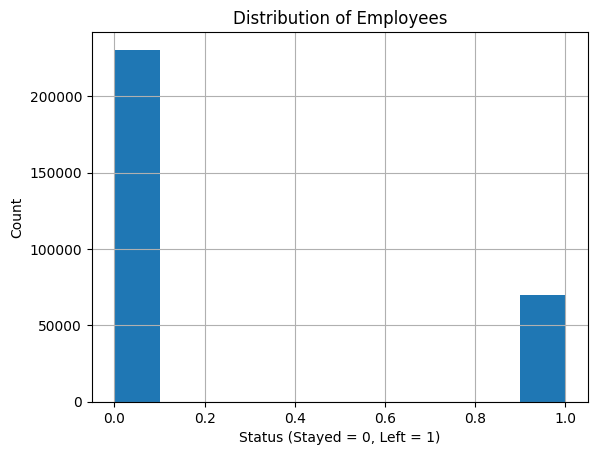

In [ ]:
#plot freq. distribution of employees who left vs stayed (0/1)
plt.hist(df['Left'])
plt.title('Distribution of Employees')
plt.xlabel('Status (Stayed = 0, Left = 1)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

The data is quite **imbalanced**, the amount of people that stayed is more than double the amount of people that left.

(Percentage of employees who left is ~23%).

In [ ]:
#calculate % of employees who left
left = df['Left'].sum()
stayed = len(df['Left']) - left

left_percentage = round((left / (len(df))) * 100, 0)

#print(left)
#print(stayed)
print(f'The percentage of employees who left the company is: {left_percentage}%')

The percentage of employees who left the company is: 23.0%


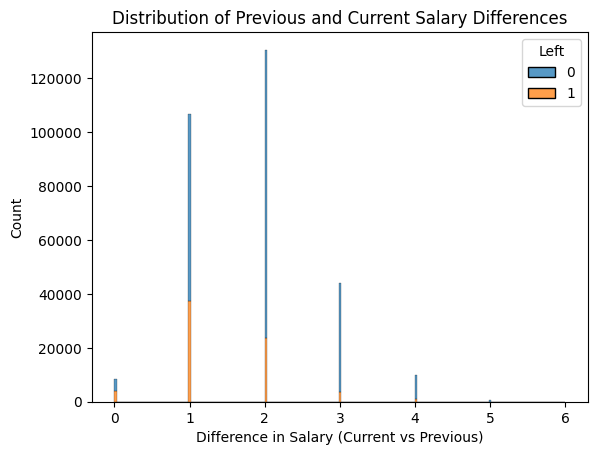

In [ ]:
#create new feature to capture salary differences

df['SalaryDiff'] = df['Salary'] - df['PreviousSalary']
  #a positive value would indicate new salary is higher than old salary (salary increase)
  #a negative value would indicate new salary is lower than old salary (salary decrease)

#plot frequency distribution of salary differences
sns.histplot(data=df, x='SalaryDiff', hue='Left', multiple='stack')
plt.title('Distribution of Previous and Current Salary Differences')
plt.xlabel('Difference in Salary (Current vs Previous)')
plt.ylabel('Count')
plt.show()

There seems to be a pattern between salary increase and chances of staying with the company.

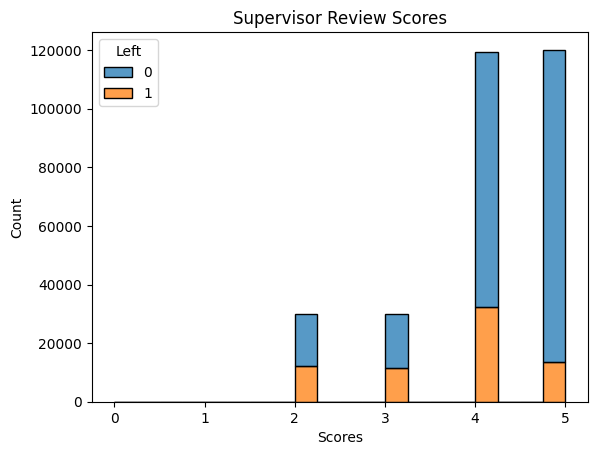

In [ ]:
#plot frequency distribution of Supervisor Review scores
sns.histplot(data=df, x='SupervisorReview', hue='Left', multiple='stack', bins=20, binrange=(0,5))
plt.title('Supervisor Review Scores')
plt.xlabel('Scores')
plt.ylabel('Count')
plt.show()

Not much difference here.

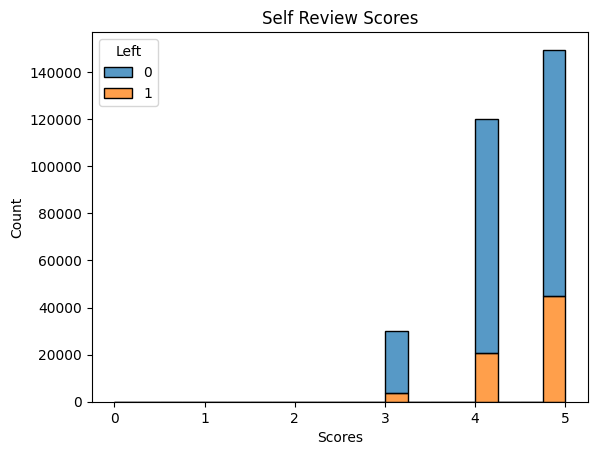

In [ ]:
#plot frequency distribution of Self Review scores
sns.histplot(data=df, x='SelfReview', hue='Left', multiple='stack', bins=20, binrange=(0,5))
plt.title('Self Review Scores')
plt.xlabel('Scores')
plt.ylabel('Count')
plt.show()

Not much difference here.

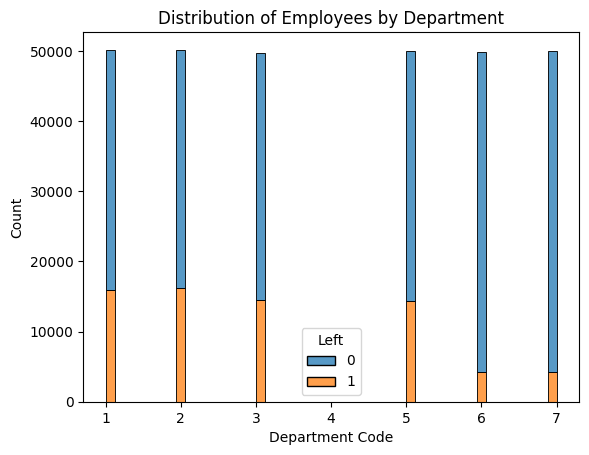

In [ ]:
#plot freq. dist of employees by assigned department
sns.histplot(data=df, x='DepartmentCode', hue='Left', multiple='stack')
plt.title('Distribution of Employees by Department')
plt.xlabel('Department Code')
plt.ylabel('Count')
plt.show()

This shows a potential pattern between the department an employee is working in and their chances of staying.

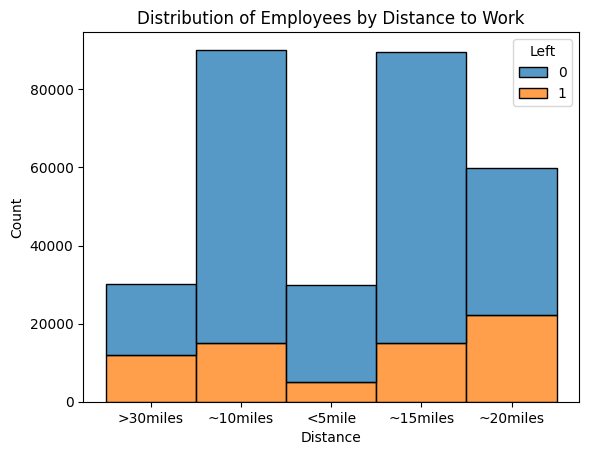

In [ ]:
#df['Distance'].unique()
sns.histplot(data=df, x='Distance', hue='Left', multiple='stack')
plt.title('Distribution of Employees by Distance to Work')
plt.xlabel('Distance')
plt.ylabel('Count')
plt.show()

This shows that 'distance to work' (commute) could play a role in employee attrition, but we would likely need a different graph to confirm.

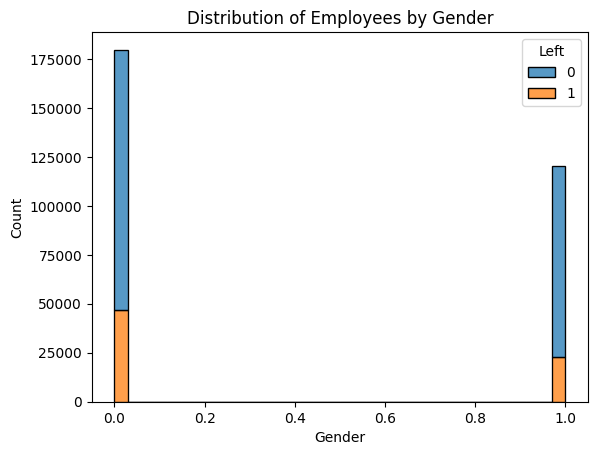

In [ ]:
#Which gender value is which?? - based on count and salary distributions, we assume 1 = female

#plot Gender distribution
sns.histplot(data=df, x='Gender', hue='Left', multiple='stack')
plt.title('Distribution of Employees by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Not much difference here.
Women make up 42% of 'stayed', and 33% of 'left'.

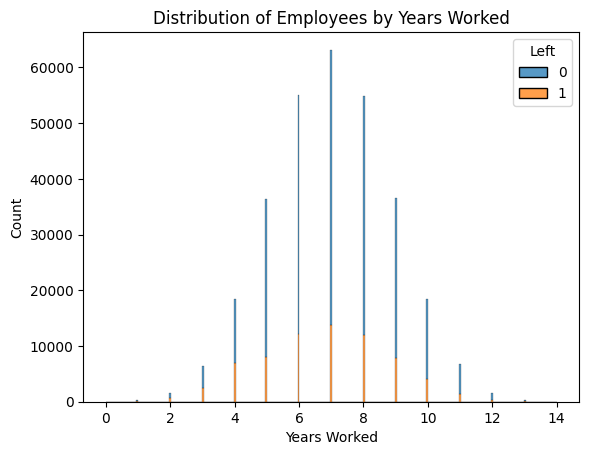

In [ ]:
#plot distribution of employees by years worked at the company
sns.histplot(data=df, x='YearsWorked', hue='Left', multiple='stack')
plt.title('Distribution of Employees by Years Worked')
plt.xlabel('Years Worked')
plt.ylabel('Count')
plt.show()

Similar underlying distribution between employees who left vs stayed.

<ipython-input-16-e16f571e2288>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


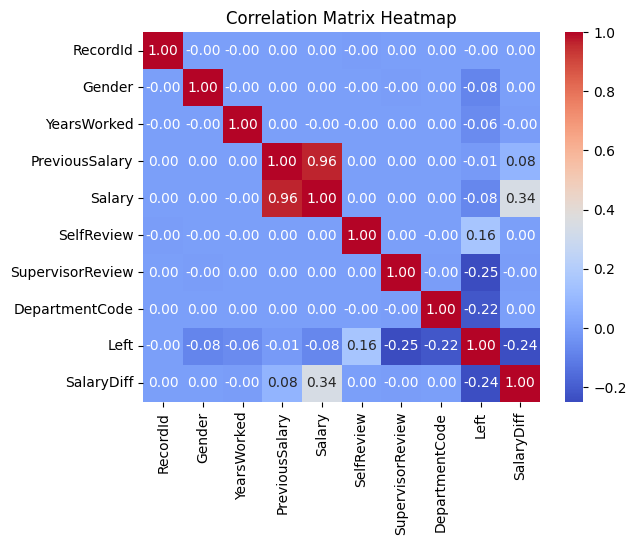

In [ ]:
#correlation matrix heatmap
correlation_matrix = df.corr()

#plot matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

'SupervisorReview' score and 'DepartmentCode' are slightly negatively correlated with target variable 'Left'.

There are no features that appear 'highly correlated' with target feature 'Left'.

*May need to consider whether including the base features with the engineered features will cause problems due to multicollinearity.*

In [ ]:
#find average Self Review score for employees based on whether they stayed with or left the company
left_employees = df[df['Left'] == 1]
stayed_employees = df[df['Left'] == 0]

mean_self_review_left = round(left_employees['SelfReview'].mean(),1)
print(f'Mean SelfReview score for employees who left: {mean_self_review_left}')

mean_self_review_stayed = round(stayed_employees['SelfReview'].mean(),1)
print(f'Mean SelfReview score for employees who stayed: {mean_self_review_stayed}')

Mean SelfReview score for employees who left: 4.6
Mean SelfReview score for employees who stayed: 4.3


In [ ]:
#find average Supervisor Review score for employees based on whether they stayed with or left the company
mean_supervisor_review_left = round(left_employees['SupervisorReview'].mean(),1)
print(f'Mean SupervisorReview score for employees who left: {mean_supervisor_review_left}')

mean_supervisor_review_stayed = round(stayed_employees['SupervisorReview'].mean(),1)
print(f'Mean SupervisorReview score for employees who stayed: {mean_supervisor_review_stayed}')

Mean SupervisorReview score for employees who left: 3.7
Mean SupervisorReview score for employees who stayed: 4.2


This shows a potential importance towards 'SupervisorReview' scores. They trend somewhat lower for those who have left the company.

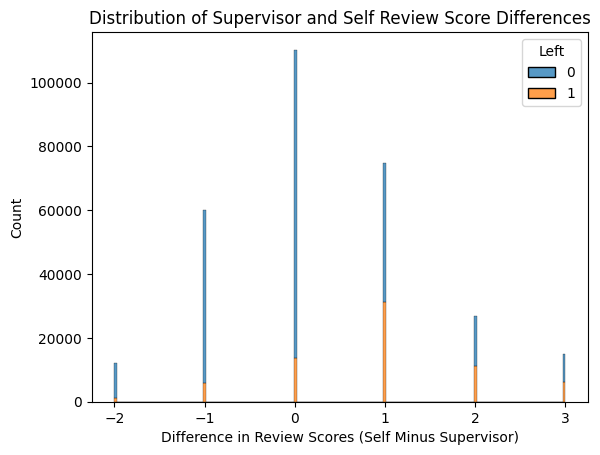

In [ ]:
#plot distribution of review score differences
df['ReviewDiff'] = df['SelfReview'] - df['SupervisorReview']
sns.histplot(data=df, x='ReviewDiff', hue='Left', multiple='stack')
plt.title('Distribution of Supervisor and Self Review Score Differences')
plt.xlabel('Difference in Review Scores (Self Minus Supervisor)')
plt.ylabel('Count')
plt.show()

The histogram above shows the difference between Self Review and Supervisor Review scores.

Employees who gave themselves a higher score than that given by their supervisor appear to be more likely to have 'left' the company.

In [ ]:
df_left_distance = df.groupby(['Distance', 'Left']).Left.count()
#df_left_distance

In [ ]:
#determine % of employees who left for each value of 'distance'
left_percentage_5 = df_left_distance['<5mile'][1] / (df_left_distance['<5mile'][0] + df_left_distance['<5mile'][1])
left_percentage_30 = df_left_distance['>30miles'][1] / (df_left_distance['>30miles'][0] + df_left_distance['>30miles'][1])
left_percentage_10 = df_left_distance['~10miles'][1] / (df_left_distance['~10miles'][0] + df_left_distance['~10miles'][1])
left_percentage_15 = df_left_distance['~15miles'][1] / (df_left_distance['~15miles'][0] + df_left_distance['~15miles'][1])
left_percentage_20 = df_left_distance['~20miles'][1] / (df_left_distance['~20miles'][0] + df_left_distance['~20miles'][1])

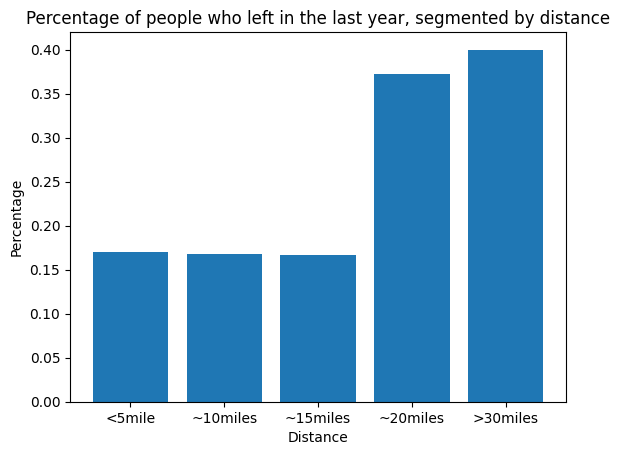

In [ ]:
#plot % of employees who left the company for each value of 'distance'
x = ['<5mile', '~10miles', '~15miles', '~20miles', '>30miles']
y = [left_percentage_5, left_percentage_10, left_percentage_15, left_percentage_20, left_percentage_30]
plt.bar(x, y)
plt.title('Percentage of people who left in the last year, segmented by distance')
plt.xlabel('Distance')
plt.ylabel('Percentage')
plt.show()

This graph more clearly shows the significance of commute distance to work on whether someone leaves the company.

The proportion of people who left increases as the commute distance increases.

In [ ]:
df_left_years = df.groupby(['YearsWorked', 'Left']).Left.count()
#df_left_years
#df_left_years.index
#df_left_years[0]

In [ ]:
#calc % of people who left for each value of years worked
y = []
for i in range(0,15):
  percentage = df_left_years[i][1] / (df_left_years[i][0] + df_left_years[i][1])
  y.append(percentage)

x = range(0, 15)

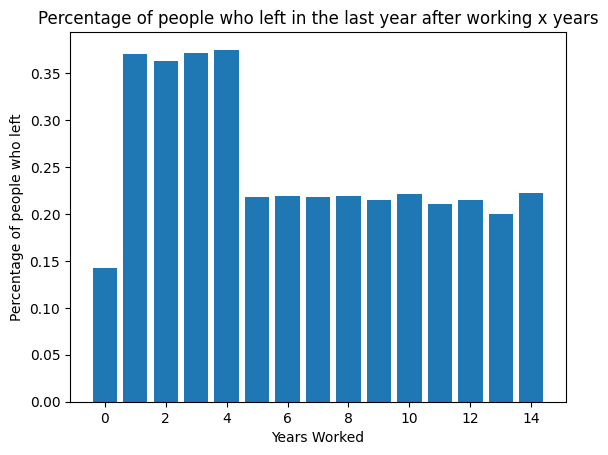

In [ ]:
#plot distribution of the % of people who left for each value of years worked
plt.bar(x, y)
plt.title('Percentage of people who left in the last year after working x years')
plt.xlabel('Years Worked')
plt.ylabel('Percentage of people who left')
plt.show()

There is not much separation between individual values of 'YearsWorked' when looking at percentage of employees who have left.

Looking at lower values vs higher values, there is only a 10-15% difference in chances of leaving.

The chances of an employee leaving appear to stablilize as years spent with the company increase.

# **Modeling**

Features that will be considered: Department Code, Review Score Difference, Salary Difference, SupervisorReview, and Distance.

In [ ]:
#Decision Tree and Random Forest Model
df.head(5)

,RecordId,Gender,Distance,YearsWorked,PreviousSalary,Salary,SelfReview,SupervisorReview,DepartmentCode,Left,SalaryDiff,ReviewDiff
0,1002332,1,>30miles,10,63,65,4.0,5.0,2,0,2,-1.0
1,1002333,0,~10miles,7,54,56,4.0,4.0,2,0,2,0.0
2,1002334,0,<5mile,5,60,61,4.0,4.0,3,0,1,0.0
3,1002335,0,~15miles,4,59,60,5.0,5.0,7,0,1,0.0
4,1002336,1,~20miles,6,61,63,5.0,5.0,5,0,2,0.0


In [ ]:
#import necessary tools
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# **Model Selection and Hyperparamter Tuning**
For hyperparameter tuning, we chose to evaluate our models based off the F1 score. This is because the dataset is imbalanced, so accuracy would not be a good metric.

Assuming that the positive case (left = 1) is more important than the negative case (i.e. it is worse to lose employees/be understaffed, than lose money through an unnecessary raises) and that we want to strike a balance between minimizing false negatives and false positives, the F1 score would be the best metric.

We also decided to take a subset of the original data to minimize computing power while tuning the hyperparameters.

**Model #1 - Logistic Regression**

In [ ]:
#Define features and create subset of data to perform hyperparameter tuning on
num_vars = ['SalaryDiff', 'ReviewDiff','SupervisorReview']
cat_vars = ['Distance', 'DepartmentCode']
X = df[num_vars + cat_vars]
y = df['Left']

X_sub = X[0:10000]
y_sub = y[0:10000]

In [ ]:
#Create a preprocessing pipeline
num_pipeline = Pipeline([
    ('imputing', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaling', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputing', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('encoding', OneHotEncoder())
])

processing_pipeline = ColumnTransformer(transformers=[
    ('num pipeline', num_pipeline, num_vars),
    ('cat pipeline', cat_pipeline, cat_vars)
])
processing_pipeline

ColumnTransformer(transformers=[('num pipeline',
                                 Pipeline(steps=[('imputing', SimpleImputer()),
                                                 ('scaling',
                                                  StandardScaler())]),
                                 ['SalaryDiff', 'ReviewDiff',
                                  'SupervisorReview']),
                                ('cat pipeline',
                                 Pipeline(steps=[('imputing',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoding',
                                                  OneHotEncoder())]),
                                 ['Distance', 'DepartmentCode'])])

In [ ]:
#Create an initial train-test split
from sklearn.model_selection import train_test_split

X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_sub, y_sub, random_state=1000, test_size=0.2)

In [ ]:
#create model pipeline - logistic regression
logreg_modeling_pipeline = Pipeline([('data_processing', processing_pipeline),
                                       ('logreg', LogisticRegression())])

In [ ]:
#Find ideal hyperparameters

logreg_param_grid = [
  {
    'logreg__penalty': ['l1', 'l2'],
    'logreg__class_weight': [None, 'balanced'],
    'logreg__C': [1, 10, 100, 1000]
  }
 ]

scoring= 'f1'

logreg_gcv = GridSearchCV(estimator=logreg_modeling_pipeline, param_grid=logreg_param_grid, cv=5, scoring=scoring)
logreg_gcv_results = logreg_gcv.fit(X_train_sub, y_train_sub)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
 

In [ ]:
logreg_gcv_results.best_params_

{'logreg__C': 1, 'logreg__class_weight': 'balanced', 'logreg__penalty': 'l2'}

In [ ]:
logreg_gcv_results.score(X_train_sub, y_train_sub)

0.5917411664538101

**Model #2: Decision Tree Classifier**

In [ ]:
#Create decision tree modeling pipeline
dt_modeling_pipeline = Pipeline([
    ('data processing', processing_pipeline),
    ('dt', DecisionTreeClassifier())
])
dt_modeling_pipeline

Pipeline(steps=[('data processing',
                 ColumnTransformer(transformers=[('num pipeline',
                                                  Pipeline(steps=[('imputing',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['SalaryDiff', 'ReviewDiff',
                                                   'SupervisorReview']),
                                                 ('cat pipeline',
                                                  Pipeline(steps=[('imputing',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder())]),
                                                  ['Distance',
                                                   'DepartmentCode'])])),
                ('dt', DecisionTreeClassifier())])

In [ ]:
#Find ideal hyperparameters
dt_param_grid = [
    {
        'dt__max_depth': [6, 7, 8],
        'dt__min_samples_leaf': [1, 5, 10]
    }
]

scoring = 'f1'

dt_gc = GridSearchCV(estimator=dt_modeling_pipeline, param_grid=dt_param_grid, cv=5, scoring=scoring)
dt_gcv_results = dt_gc.fit(X_train_sub, y_train_sub)

In [ ]:
dt_gcv_results.best_params_

{'dt__max_depth': 6, 'dt__min_samples_leaf': 10}

In [ ]:
dt_gcv_results.score(X_train_sub, y_train_sub)

0.7662979524594021

In [ ]:
dt_gcv_results.score(X_test_sub, y_test_sub)

0.7488328664799253

**Model #3: Random Forest Classifier**

In [ ]:
#Create random forest
rf_modeling_pipeline = Pipeline([
    ('data processing', processing_pipeline),
    ('rf', RandomForestClassifier())
])
rf_modeling_pipeline

Pipeline(steps=[('data processing',
                 ColumnTransformer(transformers=[('num pipeline',
                                                  Pipeline(steps=[('imputing',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['SalaryDiff', 'ReviewDiff',
                                                   'SupervisorReview']),
                                                 ('cat pipeline',
                                                  Pipeline(steps=[('imputing',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder())]),
                                                  ['Distance',
                                                   'DepartmentCode'])])),
                ('rf', RandomForestClassifier())])

In [ ]:
#find ideal hyperparameters
rf_param_grid = [
    {
        'rf__max_depth': [8, 9, 10],
        'rf__min_samples_leaf': [1, 10, 20]
    }
]

scoring = 'f1'

rf_gc = GridSearchCV(estimator=rf_modeling_pipeline, param_grid=rf_param_grid, cv=5, scoring=scoring)
rf_gcv_results = rf_gc.fit(X_train_sub, y_train_sub)

In [ ]:
rf_gcv_results.best_params_

{'rf__max_depth': 10, 'rf__min_samples_leaf': 10}

In [ ]:
rf_gcv_results.score(X_train_sub, y_train_sub)

0.7600095900263727

In [ ]:
rf_gcv_results.score(X_test_sub, y_test_sub)

0.7385496183206107

# **Model Selection**
Both the decision tree and the random forest models outperformed the logistic regression model.

The decision tree and random forest models had similar scores on the training and testing data. Since the decision tree is a simpler model, we have selected it as our final model.

**Final Model: Decision Tree Classifier + Hypertuned parameters**

In [ ]:
#New train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1000, test_size=0.2)

#Use selected model and hyperparameters
dt_modeling_pipeline = Pipeline([
    ('data_processing', processing_pipeline),
    ('dt', DecisionTreeClassifier(max_depth=6, min_samples_leaf=10))
])
dt_modeling_pipeline

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('num pipeline',
                                                  Pipeline(steps=[('imputing',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['SalaryDiff', 'ReviewDiff',
                                                   'SupervisorReview']),
                                                 ('cat pipeline',
                                                  Pipeline(steps=[('imputing',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder())]),
                                                  ['Distance',
                                                   'DepartmentCode'])])),
                ('dt',
                 DecisionTreeClassifier(max_depth=6, min_samples_leaf=10))])

In [ ]:
dt_model = dt_modeling_pipeline.fit(X_train, y_train)

In [ ]:
#visualize scoring metrics
y_hat = dt_model.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91     46043
           1       0.67      0.92      0.77     13957

    accuracy                           0.87     60000
   macro avg       0.82      0.89      0.84     60000
weighted avg       0.90      0.87      0.88     60000



In [ ]:
#visualize confusion matrix
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_hat))

[[39616  6427]
 [ 1123 12834]]


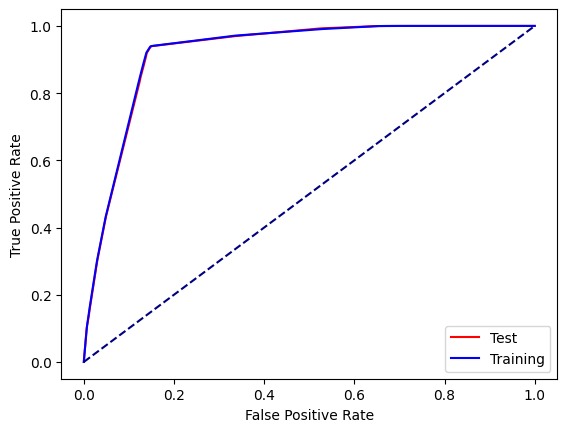

In [ ]:
#ROC curve to look at model performance / possible overfit or underfit
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def generate_probs(X, model):
    return model.predict_proba(X)[:, 1]

def generate_roc(y, probs):
    fpr, tpr, _ = roc_curve(y, probs)
    return fpr, tpr

fpr_test, tpr_test = generate_roc(y_test, generate_probs(X_test, dt_model))
fpr_train, tpr_train = generate_roc(y_train, generate_probs(X_train, dt_model))

plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

Does not appear to be overfitting.

In [ ]:
#print ROC scores
print("training roc score", roc_auc_score(y_train, generate_probs(X_train, dt_model)))
print("test roc score", roc_auc_score(y_test, generate_probs(X_test, dt_model)))

training roc score 0.9212305124407286
test roc score 0.9204226030484282


## **Conclusion**
An evaluation of the final Decision Tree model gave us an F1 score of 77% and a recall score of 92% for our target prediction metric. *(A correct prediction about an employee's impending resignation (Left = 1))*.

The ROC curve also shows a score of 92% on training and 92% on testing, which shows good performance and no overfitting.

**Potential Future Improvements:**

*   We could return to the EDA stage and dive further into the individual features to see if we missed any underlying patterns. This could lead us to engineer more of our own features.

*   We could further hypertune decision tree parameters such as: 'criterion', 'min_samples_split', 'class_weight', etc.

